# Jia Zeng 8936740 - Lab 2
---
# Part A

##### Load data and import:

In [209]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./CSVs/Lab2_dataset.csv")

In [210]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


##### Checking dataset complete or not:

In [211]:
df.isna().values.any()
df.isnull().values.any()

False

In [212]:
df['label_num'].unique()

array([0, 1], dtype=int64)

##### Set X, y and Split it into test and train:

In [213]:
X = df["text"]
y = df["label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Change text into number:

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

##### Test:

In [215]:
g = GaussianNB()
g.fit(X_train_count.toarray(), y_train)
g_pred = g.predict(X_test_count.toarray())
print(f'Gaussian accuracy score: {round(accuracy_score(y_test, g_pred), 5) * 100}%')

m = MultinomialNB()
m.fit(X_train_count.toarray(), y_train)
m_pred = m.predict(X_test_count.toarray())
print(f'Multinominal accuracy score: {round(accuracy_score(y_test, m_pred), 5) * 100}%')

Gaussian accuracy score: 95.459%
Multinominal accuracy score: 97.198%


##### Multinominal get the higher mark! So Multinominal is a better model for this situation.

---
# Part B

##### Load data and import:

In [216]:
import seaborn as sn
df_airbnb = pd.read_csv("./CSVs/AB_NYC_2019.csv")

In [217]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [218]:
df_airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

##### Checking dataset:

In [219]:
print(f'NA in price? {df_airbnb.price.isna().any()}.')
print(f'Null in price? {df_airbnb.price.isnull().any()}.')

NA in price? False.
Null in price? False.


There's no missing value in price.

<Axes: xlabel='price', ylabel='Count'>

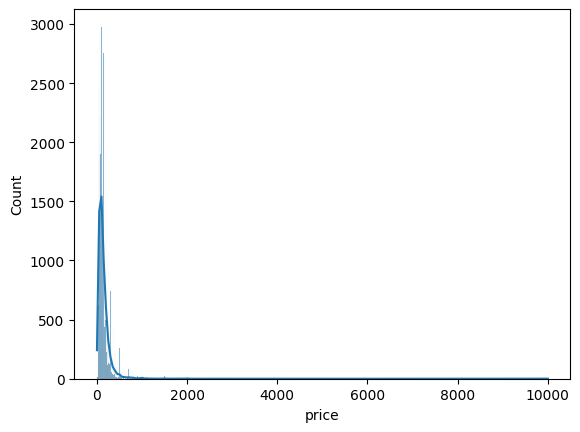

In [220]:
sn.histplot(df_airbnb.price, kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x279c6b83310>,
 'caps': [<matplotlib.lines.Line2D at 0x279c646a6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x279c6ba8590>],
 'medians': [<matplotlib.lines.Line2D at 0x279c6bab050>],
 'fliers': [<matplotlib.lines.Line2D at 0x279c5143710>],
 'means': []}

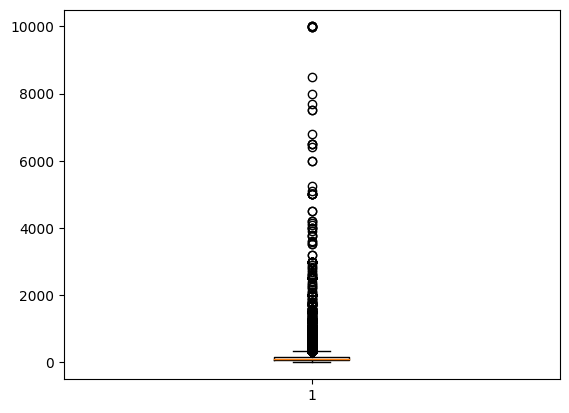

In [221]:
plt.boxplot(df_airbnb.price, vert=True)

##### Mean:

In [222]:
mean = df_airbnb.price.mean()
std_deviation = df_airbnb.price.std()
low_mean = mean - 3 * std_deviation
high_mean = mean + 3 * std_deviation
outliers_mean = df_airbnb[(df_airbnb.price >= low_mean) & (df_airbnb.price <= high_mean)]
outliers_mean.price.describe()

count    48507.000000
mean       138.746903
std        107.558233
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x279c6c00ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x279c6c020d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x279c6c00890>],
 'medians': [<matplotlib.lines.Line2D at 0x279c6c031d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x279c6c038d0>],
 'means': []}

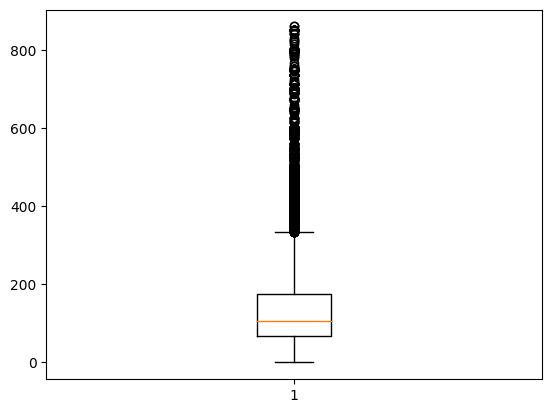

In [223]:
plt.boxplot(outliers_mean.price, vert=True)

##### Median:

In [224]:
median = df_airbnb.price.median()
# median absolute deviation
mad = np.abs(df_airbnb.price - median).median()
low_median = median - 3 * mad
high_median = median + 3 * mad
outlier_median = df_airbnb[(df_airbnb.price >= low_median) & (df_airbnb.price <= high_median)]
outlier_median.price.describe()

count    42410.000000
mean       107.046168
std         52.848804
min          0.000000
25%         65.000000
50%         99.000000
75%        149.000000
max        244.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x279c21278d0>,
 'caps': [<matplotlib.lines.Line2D at 0x279c6c24a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x279c2126f50>],
 'medians': [<matplotlib.lines.Line2D at 0x279c212db90>],
 'fliers': [<matplotlib.lines.Line2D at 0x279c212c990>],
 'means': []}

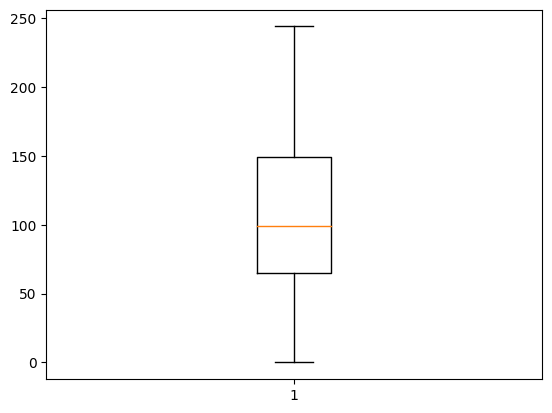

In [225]:
plt.boxplot(outlier_median.price, vert=True)

##### Percentiles:

In [226]:
min_limit, max_limit = df_airbnb.price.quantile([0.01, 0.99])
outliers_percentiles = df_airbnb[(df_airbnb.price >= min_limit) & (df_airbnb.price <= max_limit)]
outliers_percentiles.price.describe()

count    48017.000000
mean       138.502010
std        103.694011
min         30.000000
25%         70.000000
50%        105.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x279c2183ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x279c2190dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x279c6c24990>],
 'medians': [<matplotlib.lines.Line2D at 0x279c2191f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x279c2143f90>],
 'means': []}

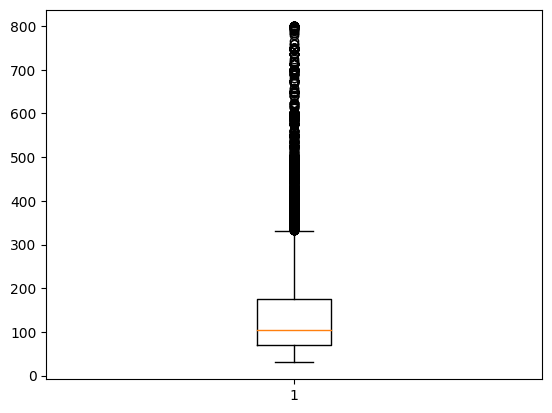

In [227]:
plt.boxplot(outliers_percentiles.price, vert=True)

##### It shows by the boxplot and the lower std, the way of using the median to identify outliers its the one that cleans most in this situation.

---
##### Magic code for Convert to HTML
jupyter nbconvert --to html ./students-submissions/8936740/Lab2.ipynb --output-dir ./students-submissions/8936740 --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['noshow']"